# Applied Machine Learning

Starting at Analytics Vidhya

 - Basic Example
 - ...

## Libraries we will be using

In [5]:
# Numerical Computation 
import numpy as np

# DataFrames or Spreadsheet stuff
import pandas as pd

# Visualisation: Matplotlib -> Seaborn 
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning: scikit-learn (based on scipy)
import sklearn

## Human Rule Writing

In [6]:
df = pd.read_csv("data/creditRisk.csv")

In [7]:
df.shape

(18, 3)

In [9]:
df.columns

Index(['Income', 'Credit History', 'Risk'], dtype='object')

### Question

Write the rules as a programmer to predict the `risk` given a person's `income` and `credit history`. 

You can use paper & pen or python loops/for/if-then basic to do that...

In [14]:
df.head()

,Income,Credit History,Risk
0,0,Unknown,High
1,0,Bad,High
2,0,Good,High
3,14000,Unknown,High
4,14000,Bad,High


## Machine Rules

In [18]:
# See the data
plt.style.use("ggplot")

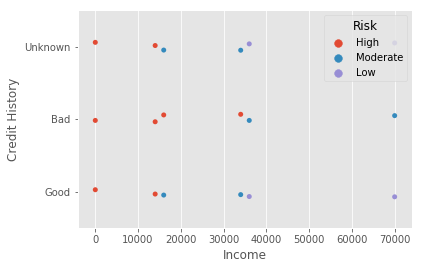

In [19]:
sns.stripplot(x=df.Income, y = df["Credit History"], hue=df.Risk)

In [28]:
df_encoded = df.copy()

## Preprocessing 
Converting it "Risk" and "Credit History" to numbers

In [20]:
from sklearn.preprocessing import LabelEncoder

In [25]:
# Instantiate an instance of it
le = LabelEncoder()

In [26]:
# Fit the label encoder
le.fit(df['Credit History'])

LabelEncoder()

In [29]:
df_encoded["Credit History"]= le.transform(df["Credit History"])

In [31]:
le.classes_

array(['Bad', 'Good', 'Unknown'], dtype=object)

In [32]:
le.inverse_transform(np.array([0,1,2]))

array(['Bad', 'Good', 'Unknown'], dtype=object)

In [30]:
df_encoded.head()

,Income,Credit History,Risk
0,0,2,High
1,0,0,High
2,0,1,High
3,14000,2,High
4,14000,0,High


#### Lets do the same for Risk

In [35]:
le2 = LabelEncoder()
le2.fit(df.Risk)
df_encoded["Risk"] = le2.transform(df.Risk)

In [55]:
le2.inverse_transform(np.array([0,1,2]))

array(['High', 'Low', 'Moderate'], dtype=object)

In [36]:
df_encoded.head()

,Income,Credit History,Risk
0,0,2,0
1,0,0,0
2,0,1,0
3,14000,2,0
4,14000,0,0


### Model - Decision Tree Classifier

- data or X - features
- label or y - target

In [41]:
X = df_encoded[["Income", "Credit History"]]
y = df_encoded["Risk"]

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
# Instantiate the Object
clf = DecisionTreeClassifier(criterion="entropy")

In [67]:
# Fit it on the features and target
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [68]:
# Predict ??

### Visualise the Rules that the Machine has learnt

First run this in the terminal

```
pip install modelvis
```

In [69]:
import modelvis

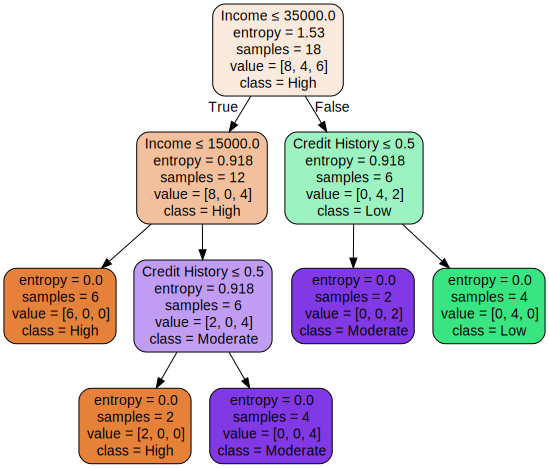

In [70]:
modelvis.render_tree(clf, feature_names=X.columns,
                    class_names=['High', 'Low', 'Moderate'])

In [71]:
modelvis.print_tree_as_code(clf)

def predict(row):
    """Your decision-tree model wrote this code."""
    # 18 samples; value=[8, 4, 6]; class=0
    if row[0] < 35000.0:
        # 12 samples; value=[8, 0, 4]; class=0
        if row[0] < 15000.0:
            # 6 samples; value=[6, 0, 0]; class=0
            return 0
        else:
            # 6 samples; value=[2, 0, 4]; class=2
            if row[1] < 0.5:
                # 2 samples; value=[2, 0, 0]; class=0
                return 0
            else:
                # 4 samples; value=[0, 0, 4]; class=2
                return 2
    else:
        # 6 samples; value=[0, 4, 2]; class=1
        if row[1] < 0.5:
            # 2 samples; value=[0, 0, 2]; class=2
            return 2
        else:
            # 4 samples; value=[0, 4, 0]; class=1
            return 1



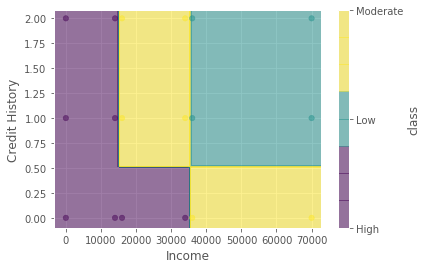

In [72]:
modelvis.plot_decision_boundaries(clf, X, y,
                                 feature_names=X.columns, show_input = True,
                                 class_names=["High", "Low", "Moderate"])

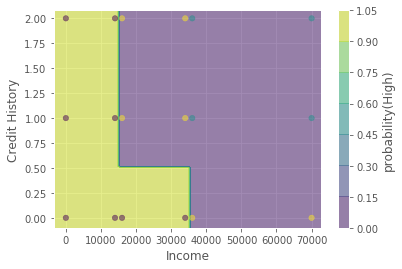

In [99]:
modelvis.plot_decision_boundaries(clf, X, y, probability=True,
                                 feature_names=X.columns, show_input = True,
                                 class_names=["High", "Low", "Moderate"])

### Measure Performance of this model

In [73]:
from sklearn.metrics import accuracy_score

In [78]:
y_true = y
y_pred = clf.predict(X)

In [79]:
accuracy_score(y_true, y_pred)

1.0

## Model - Linear Model

In [81]:
a = np.arange(-10, 10, 1)
a

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9])

In [82]:
def logit(a):
    b = 1 / (1 + np.exp(-a))
    return b

In [84]:
b = logit(a)
b

array([4.53978687e-05, 1.23394576e-04, 3.35350130e-04, 9.11051194e-04,
       2.47262316e-03, 6.69285092e-03, 1.79862100e-02, 4.74258732e-02,
       1.19202922e-01, 2.68941421e-01, 5.00000000e-01, 7.31058579e-01,
       8.80797078e-01, 9.52574127e-01, 9.82013790e-01, 9.93307149e-01,
       9.97527377e-01, 9.99088949e-01, 9.99664650e-01, 9.99876605e-01])

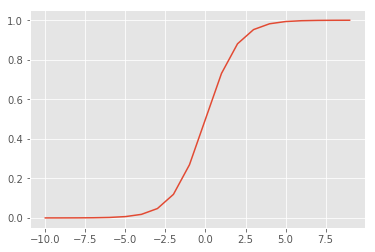

In [85]:
plt.plot(a, b)

## Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression

In [95]:
lr = LogisticRegression(multi_class="ovr", solver="liblinear")
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [96]:
lr.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

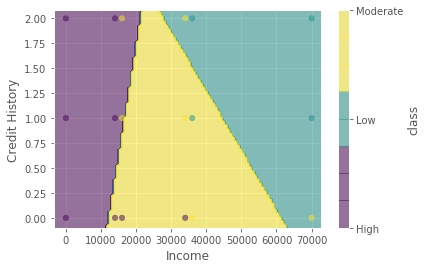

In [97]:
modelvis.plot_decision_boundaries(lr, X, y,
                                 feature_names=X.columns, show_input = True,
                                 class_names=["High", "Low", "Moderate"])

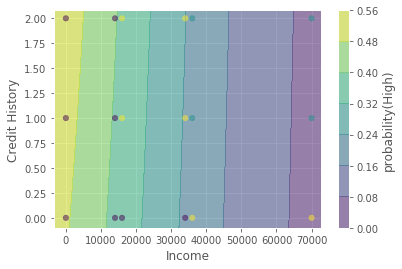

In [98]:
modelvis.plot_decision_boundaries(lr, X, y, probability=True,
                                 feature_names=X.columns, show_input = True,
                                 class_names=["High", "Low", "Moderate"])

In [100]:
y_true = y
y_pred = lr.predict(X)

In [101]:
accuracy_score(y_true, y_pred)

0.5555555555555556